## Buiseness Problem Understanding




## **Business Context**
Diabetes is a chronic health condition that affects millions of people worldwide. Early detection and proactive management can help mitigate complications and improve patient outcomes. Healthcare providers, insurance companies, and wellness programs require an accurate and efficient way to predict diabetes risk based on patient health metrics.

## **Problem Statement**
The goal is to develop a machine learning model that can predict whether a patient is likely to have diabetes based on health indicators such as glucose levels, blood pressure, BMI, and family history. The classifier will assist healthcare professionals in early diagnosis and preventive care recommendations.


## **Data Overview**
The dataset consists of the following features:
- **Pregnancies**: Number of times a patient has been pregnant.
- **Glucose**: Plasma glucose concentration.
- **BloodPressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skinfold thickness (mm).
- **Insulin**: Serum insulin level (mu U/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: A measure of diabetes likelihood based on family history.
- **Age**: Patient’s age in years.
- **Outcome**: Target variable (1 = Diabetic, 0 = Non-diabetic).

## **Business Impact**
1. **Early Diagnosis**: Helps doctors and patients take proactive measures before severe complications arise.
2. **Cost Reduction**: Reduces healthcare costs by minimizing hospital admissions and expensive treatments.
3. **Personalized Health Plans**: Enables personalized recommendations for at-risk individuals based on their health profiles.
4. **Insurance and Risk Assessment**: Assists insurance companies in assessing health risks and setting premiums accordingly.

## **Success Metrics**
- **Accuracy & F1-score**: Ensuring a balanced performance between precision and recall.
- **Interpretability**: Providing feature importance insights for medical professionals.
- **Real-world Impact**: Adoption of the model by healthcare professionals and improved patient outcomes.

By leveraging machine learning for diabetes prediction, healthcare providers can improve early detection and preventative care strategies, leading to better health outcomes for patients.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].nunique()

2

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
continuous=['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age','Insulin','SkinThickness']
discrete_count=['Pregnancies']
discrete_categorical=['Outcome']

In [8]:
df[continuous].describe()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Insulin,SkinThickness
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,31.992578,0.471876,33.240885,79.799479,20.536458
std,31.972618,19.355807,7.884160,0.331329,11.760232,115.244002,15.952218
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,99.000000,62.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,117.000000,72.000000,32.000000,0.372500,29.000000,30.500000,23.000000
75%,140.250000,80.000000,36.600000,0.626250,41.000000,127.250000,32.000000
max,199.000000,122.000000,67.100000,2.420000,81.000000,846.000000,99.000000


<Axes: >

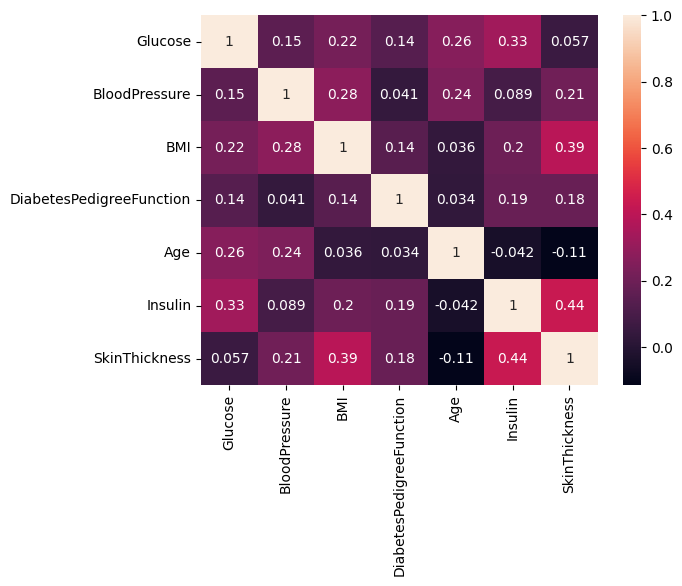

In [9]:
sns.heatmap(df[continuous].corr(),annot=True)

## Data Preprocessing

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

## train-test-split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)


In [14]:
X_train.iloc[:,1:8]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,134,70,23,130,35.4,0.542,29
222,119,0,0,0,25.2,0.209,37
565,95,54,14,88,26.1,0.748,22
576,108,44,20,130,24.0,0.813,35
152,156,86,28,155,34.3,1.189,42
...,...,...,...,...,...,...,...
321,112,74,30,0,31.6,0.197,25
581,109,60,27,0,25.0,0.206,27
121,111,64,39,0,34.2,0.260,24
238,164,84,21,0,30.8,0.831,32


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,1:8]=sc.fit_transform(X_train.iloc[:,1:8])
X_test.iloc[:,1:8]=sc.fit_transform(X_test.iloc[:,1:8])

## Modelling & Evaluation

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
ypred_train=model.predict(X_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(f"Train accuracy score is {accuracy_score(y_train,ypred_train)}")
ypred_test=model.predict(X_test)
print(f"Test accuracy score is {accuracy_score(y_test,ypred_test)}")
print(f"Cross val score is {(cross_val_score(model,X_train,y_train,cv=5)).mean()}")

Train accuracy score is 0.7719869706840391
Test accuracy score is 0.8116883116883117
Cross val score is 0.752472344395575


In [18]:
ypred_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred_test)
cm

array([[93,  9],
       [20, 32]], dtype=int64)

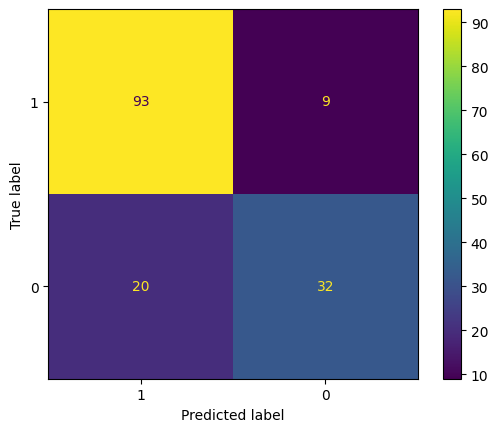

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['Outcome'].unique()).plot()
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       102
           1       0.78      0.62      0.69        52

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.81      0.81      0.81       154



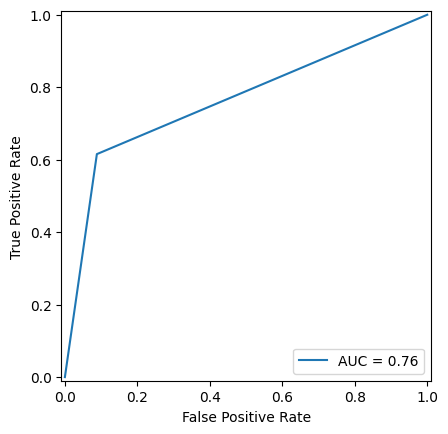

In [22]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7635746606334842

## Prediction

In [24]:
ypred_test=model.predict_proba(X_test)[:,1]

In [25]:
ypred_test

array([0.59359013, 0.19131188, 0.02895621, 0.06009931, 0.10231164,
       0.7282921 , 0.24442474, 0.10812145, 0.224561  , 0.12044508,
       0.2075417 , 0.42295369, 0.77665561, 0.91285159, 0.26588896,
       0.35025804, 0.87968349, 0.17753133, 0.10997077, 0.37371573,
       0.03795636, 0.42726903, 0.34816752, 0.09795057, 0.17783295,
       0.05215607, 0.95806808, 0.09411581, 0.10403022, 0.14477153,
       0.13111142, 0.2312561 , 0.46793187, 0.09371557, 0.43666984,
       0.08039953, 0.07573636, 0.89353704, 0.34261942, 0.15099695,
       0.4467154 , 0.90789744, 0.26992854, 0.61976035, 0.08223163,
       0.19054791, 0.63806051, 0.18827604, 0.45573808, 0.07442365,
       0.18685007, 0.87059479, 0.15242928, 0.12124891, 0.24375087,
       0.36564159, 0.2372546 , 0.62160738, 0.82819155, 0.09517641,
       0.05188601, 0.03985052, 0.52054963, 0.08390963, 0.78184432,
       0.82112591, 0.45624443, 0.77983311, 0.30846766, 0.05752732,
       0.09209435, 0.09287876, 0.78266726, 0.12061046, 0.09267

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.8776395173453997

# **Conclusion: Diabetes Prediction Model Performance**

The diabetes prediction model demonstrates **solid overall performance**, with an **accuracy of 81.17% on the test set** and a **cross-validation score of 75.25%**, indicating that the model generalizes well to unseen data.

## **Key Observations**
### **1. Accuracy**
- **Training Accuracy**: **77.20%** (Model learns well on training data).
- **Test Accuracy**: **81.17%** (Model performs better on test data, suggesting it is not overfitting).
- **Cross-Validation Score**: **75.25%** (Confirms generalizability).

### **2. Precision & Recall**
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Non-Diabetic Patients)** | 82% | 91% | 87% | 102 |
| **1 (Diabetic Patients)** | 78% | 62% | 69% | 52 |

- **Class 0 (Non-Diabetic Patients)**
  - **Precision**: **82%** → When predicting "No Diabetes," it is correct 82% of the time.
  - **Recall**: **91%** → Captures most actual non-diabetic cases.
  
- **Class 1 (Diabetic Patients)**
  - **Precision**: **78%** → When predicting "Diabetes," it is correct 78% of the time.
  - **Recall**: **62%** → Misses some diabetic cases, meaning some diabetic patients are misclassified as non-diabetic.

### **3. F1-Score & Weighted Metrics**
- **F1-Score for Class 1 (Diabetic Patients) = 69%**  
  - Indicates a trade-off between precision and recall.
- **Weighted Average F1-Score = 81%**, showing balanced performance across classes.

### **4. ROC-AUC Score**
- **ROC-AUC Score: 0.8777**  
  - AUC of **87.77%** suggests a **strong ability to distinguish between diabetic and non-diabetic patients**.

## **Final Assessment**
### ✅ **Strengths**
- Good overall accuracy and strong **AUC score (87.77%)**, showing high discriminatory power.
- High recall for **non-diabetic cases (91%)**, reducing false negatives for healthy individuals.


## **Conclusion**
The model performs well, **successfully predicting diabetes in most cases**. However, improvements in recall for diabetic patients could make it even more effective for **early detection and intervention**. Future enhancements can focus on **balancing false negatives vs. false positives** to ensure at-risk patients are identified correctly. 🚀
